## Final Project Submission

Please fill out:
* Student name: Kevin Gitahi
* Student pace: full time student
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge/Diana Mongina
* Blog post URL:


## PHASE_1 PROJECT

## TITLE:EXPLORATORY DATA ANALYSIS FOR MICROSOFT'S UPCOMING FILM STUDIO.

## 1.0 BUSINESS UNDERSTANDING
1.1 INTRODUCTION.

Microsoft Studio, a brand-new film production company, brought this concept to life. 
With the intention of assisting them in making quality films that would be successful in the future, they tasked me to undertake research using databases from other seasoned film production firms, like Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Number. Due to its recent establishment, this film studio lacks experience in creating quality films that would be commercially successful. To find the films that other production companies utilize to make additional quality films, I will thus need to employ the imported data from those studios.

1.2 PROBLEM STATEMENT.

Microsoft aims to be a successful player in the entertainment industry by avoiding the complexities of the film studio industry and starting a new company that will create original video content that will appeal to audiences and maximize revenue.With no prior experience in film production, Microsoft recognizes the need to educate itself on the current landscape of box office performers. This knowledge is critical to the studio's strategic decisions regarding the kinds of films it should produce in order to draw audiences and thrive in the fiercely competitive market.

1.3 MAIN OBJECTIVE.

The main objective of this project is to identify the genres of film or films that are currently doing well at the box office in order to examine current trends in the film industry. The results will be used to shed light on decisions about the kinds of films that the Microsoft Company, a new studio, will make.
 
 1.4 SPECIFIC OBJECTIVES.
 
  1. To examine the present cinematic trends based on Box Office Productions
  2. To review the mined data  in order to identify the films that are doing well at the box office.
  3. Translating the results into useful information that Microsoft Studio may utilize to make wise choices for creating         high-caliber films.
  4. To offer suggestions for the kinds of movies that are most likely to be popular  in future.
     
 1.5 SIGNIFICANCE OF THE STUDY/ RECOMMENDATION
   (ADD CONTENT THE ADVISE TO THE STAKEHOLDERS) 

## DATA MINING
This project used data from databases from other seasoned film production firms,That is:
* Box Office Mojo 
* Rotten Tomatoes
* IMDB SQL Database(structure shown in the attached image)
* 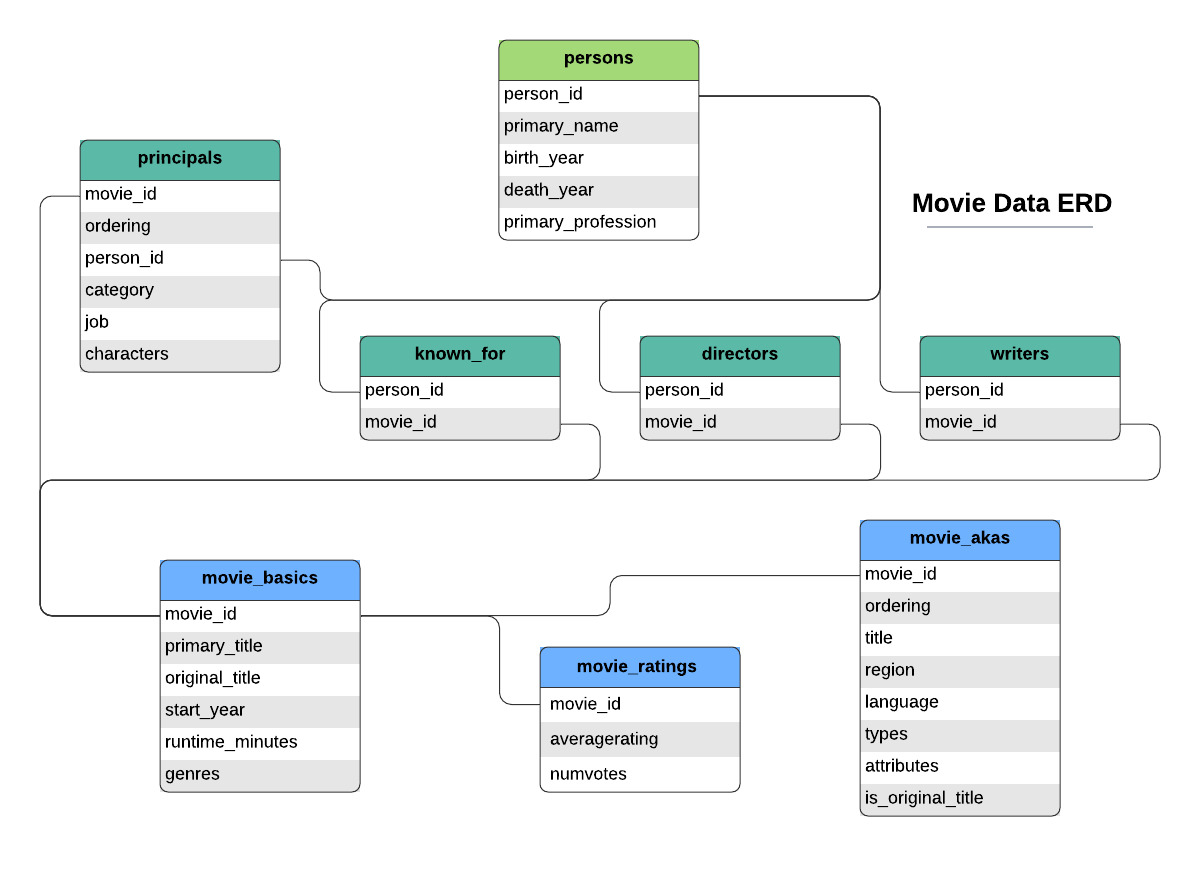


I loaded the data samples into my databases, where I utilized them to ascertain the films and genres that are now enjoying commercial success.The data is made up of *****(ADD INFORMATION AFTER DOING THE ANALYSIS TO SEE THE STRUCTURE OF THE DATA)



## 2.0 DATA CLEANING
Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

When carrying out data cleaning i had to ask myself the following Questions so that I could  clean my data appropriately.
    
    QUESTIONS
 * What are the columns?
 * How many observations?
 * Are there missing values?
 * Any outliers?

## 2.2 DATA CLEANING - IMDB SQL FILE

Imported the zipfile module, opened a zip file named 'im.db.zip' located in the 'zippedData' directory in read mode, and extracted all the contents of the zip file into the 'zippedData' directory.

In [2]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

Understanding the database and retrieving the tables(names) as Table Names that make  our database im.db to match the attached image above(IMDB SQL Database)

In [3]:
import sqlite3

conn = sqlite3.connect('zippedData/im.db')
table_query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(table_query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
table_name_query ="""SELECT name
                     AS"Table Names"
                     FROM sqlite_master
                     WHERE type = 'table';"""
pd.read_sql(table_name_query,conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## EXPLORATION DATA ANALYSIS/DATA EXPLORATION

## FEATURE ENGINEERING

## DATA VISUALIZATION

In [ ]:
# Your code here - remember to use markdown cells for comments as well!